# 3. Classification with classic ML methods

After preprocessing, some duplicates appeared. We removed them. Then, with RegexpTokenizer from nltk module, we made tokenization. In the next step, we converted text to vectors using CountVectorizer from sklearn.<br>
Then we built 3 models:
* logistic regression
* naive bayes
* kNN


The last step was evaluation with ROC curves and confusion matrixes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [ ]:
# read preprocessed data with labels
df = pd.read_csv('/content/drive/MyDrive/ZUM_NLP/tweets_data_labeled_prepro.csv', index_col=False)
df.drop(['Unnamed: 0','index','text'], axis=1, inplace=True)
df

,sentiments_val,text_prep
0,neutral,coronavirus dotrze polski napotka opor znakomi...
1,positive,kolejni polacy chca wrocic wuhan
2,negative,tymczasem wuhan odcieto reszty swiata obszar p...
3,positive,zdziwie powiedza listy pojechały chin wuhan od...
4,positive,polakow chce wrocic wuhan ambasadzie rp pekini...
...,...,...
456911,negative,piatek maja punkt szczepien powszechnych ul no...
456912,neutral,przyjdz porozmawiaj dowiedz wiecej szczepieniu...
456913,neutral,serio chca wprowadzic prace zdalna wymiarze dn...
456914,negative,szczepienia przeciw covid organizowane szkołac...


In [ ]:
# Check if there are missing values or duplicates. If so, we remove them.
print(df.isnull().sum())
df.dropna(inplace=True)

print('Number of duplicates:', df.duplicated().sum())
df.drop_duplicates()

df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

sentiments_val       0
text_prep         3015
dtype: int64
Number of duplicates: 52188


In [ ]:
# tokenization
tokenizer = RegexpTokenizer(r'\w+')
df['text_prep'] = df['text_prep'].apply(tokenizer.tokenize)
df

,sentiments_val,text_prep
0,neutral,"[coronavirus, dotrze, polski, napotka, opor, z..."
1,positive,"[kolejni, polacy, chca, wrocic, wuhan]"
2,negative,"[tymczasem, wuhan, odcieto, reszty, swiata, ob..."
3,positive,"[zdziwie, powiedza, listy, pojechały, chin, wu..."
4,positive,"[polakow, chce, wrocic, wuhan, ambasadzie, rp,..."
...,...,...
453896,negative,"[piatek, maja, punkt, szczepien, powszechnych,..."
453897,neutral,"[przyjdz, porozmawiaj, dowiedz, wiecej, szczep..."
453898,neutral,"[serio, chca, wprowadzic, prace, zdalna, wymia..."
453899,negative,"[szczepienia, przeciw, covid, organizowane, sz..."


In [ ]:
# split for X and y variables
X = df['text_prep']
y = df.replace({"sentiments_val": {'negative':0, 'neutral':1, 'positive':2}})['sentiments_val']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=24)

In [ ]:
# TFIDF - strings to vectors
def dummy(doc):
    return doc

tfidf = CountVectorizer(tokenizer=dummy, preprocessor=dummy,)  
tfidf.fit(X_train)

print(*tfidf.get_feature_names()[:10], sep='\n')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


a_
a_be
a_duda
a_niedzielski
aa
aaa
aaaa
aaaaa
aaaaaa
aaaaaaa


In [ ]:
X_train = tfidf.transform(X_train)
X_test  = tfidf.transform(X_test)

In [ ]:
# LOGISTIC REGRESSION
logreg = OneVsRestClassifier(LogisticRegression())
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# NAIVE BAYES
MultNbayes = MultinomialNB()
MultNbayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# kNN
kNN = KNeighborsClassifier(n_neighbors=4)
kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
def plot_multiROC(pred_prob, title):
    """
    Fuction plot three ROC curves - ONE vs REST classification for given probabilities
    """
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    for i in range(3):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()

def plot_conf_matrix(conf_matrix, title):
    """
    Function plot confusion matrix for given confusion matrix
    """
    heatmap(conf_matrix, annot=True, xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
    plt.title(f'Confusion Matrix for: {title}')
    plt.xlabel('PREDICTED')
    plt.ylabel('TRUE')
    plt.show()

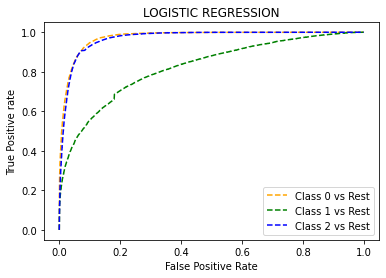

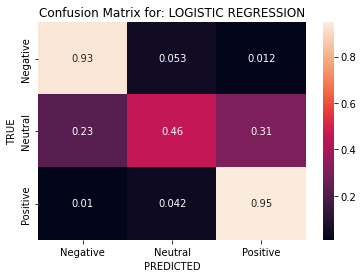

In [ ]:
plot_multiROC(pred_prob = logreg.predict_proba(X_test), title = 'LOGISTIC REGRESSION')
plot_conf_matrix(confusion_matrix(y_test, logreg.predict(X_test), normalize='true'), title = 'LOGISTIC REGRESSION')

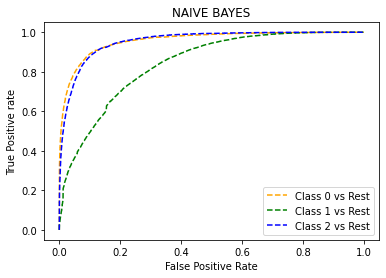

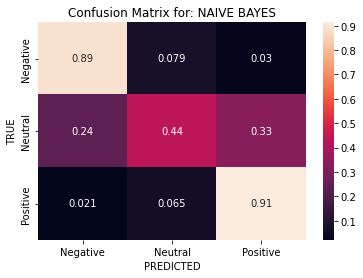

In [ ]:
plot_multiROC(pred_prob = MultNbayes.predict_proba(X_test), title = 'NAIVE BAYES')
plot_conf_matrix(confusion_matrix(y_test, MultNbayes.predict(X_test), normalize='true'), title='NAIVE BAYES')

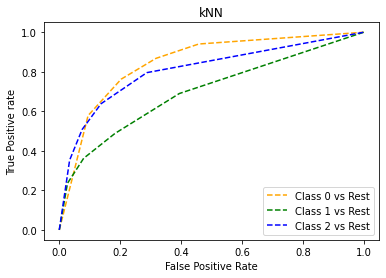

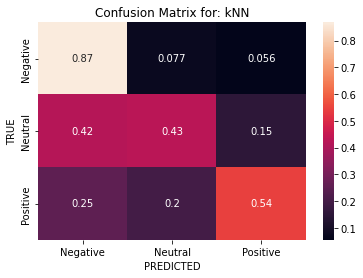

In [ ]:
plot_multiROC(pred_prob = kNN.predict_proba(X_test), title = 'kNN')
plot_conf_matrix(confusion_matrix(y_test, kNN.predict(X_test), normalize='true'), title='kNN')

Logistic regression seems to be the best model.